<a href="https://colab.research.google.com/github/shilz1007/shilz1007/blob/main/ACIT4510_1_22H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)  #  link pandas to plotly and add the iplot method
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [2]:
path = '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.drop(['id'],axis=1,inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# ***Observation***
Number of numerical features : 6
Age, hypertension,heart_disease,avg_glucose_level,bmi,stroke

Number of categorical feature : 5
gender,ever_married,work_type,residence_type,smoking_status

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observation- 

1.   avg_glucose_level has a max of 271.74 which seems to be an outlier.
2.   bmi has a max of 97.6 which is absurd and can be an outlier.



# *Finding null values*

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
[features for features in df.columns if df[features].isnull().sum() > 1]

['bmi']

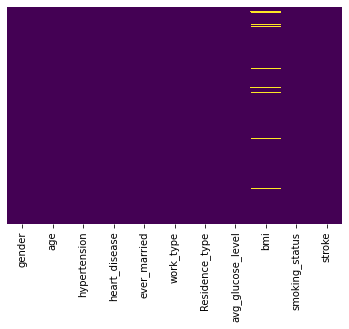

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 Observation - The field BMI has Null values


Finding num of categories in categorical variables

In [ ]:
print('Work type      : ',df['work_type'].unique())
print('Residence type : ',df['Residence_type'].unique())
print('Ever married   : ',df['ever_married'].unique())
print('Smoking Status : ',df['smoking_status'].unique())

Work type      :  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence type :  ['Urban' 'Rural']
Ever married   :  ['Yes' 'No']
Smoking Status :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Smoking status has value 'unknown' which means we do not know whether the person was a smoker or not.

Finding number of unknown with respect to gender and age

In [ ]:
len(df[df.smoking_status == 'Unknown'])

1544

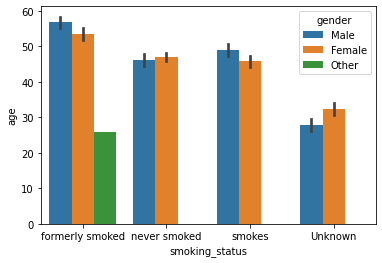

In [ ]:
##sns.countplot(df['age'],df['smoking_status'])
sns.barplot(y = df.age,x = df.smoking_status,hue=df.gender)

1544 records of male between age 0-30 and female between age 0-40 have smoking status as unknown

Numerical variables


1.   Age
2.   hypertension
3.   heart_disease,
4.   avg_glucose_level
5.   bmi
6.   stroke



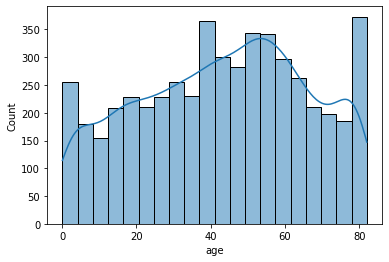

In [ ]:
sns.histplot(df['age'],kde='true')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



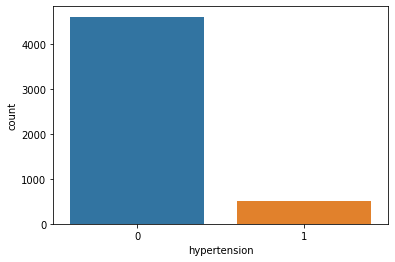

In [ ]:
sns.countplot(df['hypertension'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



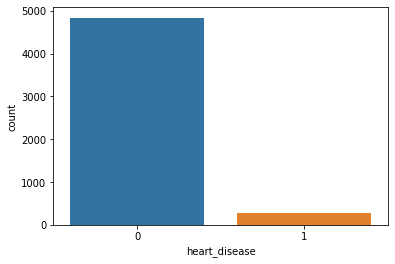

In [ ]:
sns.countplot(df['heart_disease'])

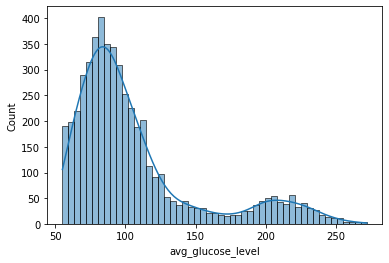

In [ ]:
sns.histplot(df['avg_glucose_level'],kde='true')

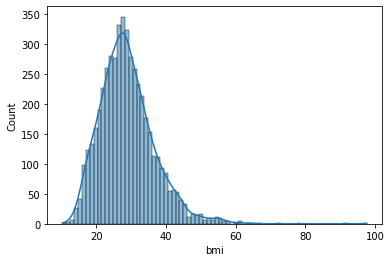

In [ ]:
sns.histplot(df['bmi'],kde='true')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



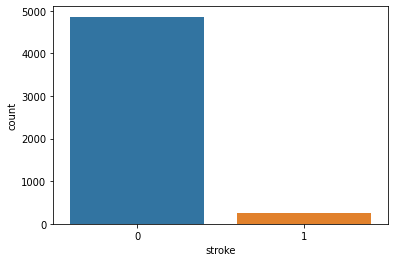

In [ ]:
sns.countplot(df['stroke'])

In [ ]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Observation from Numerical Variables:


1.   Dataset has more people between 40-60 and over 350 people are of 80+ years.
2.   4000+ people dont have hypertension.
3.   Out of 5000 people in the dataset more than 80% don't have a heart disease.
4.   The most density of data for avg glucose level ranges between 50-100.   
     There are some outliers as well which has values of 250.
5.  The most density of BMI is between 20-40.There are outliers.
6.  The dataset contains over 4861 records of not stroke and 249    
    records of stroke. The dataset is imbalanced.      





 Categorical Variable


1.   gender
2.   ever_married
3.   work_type
4.   residence_type
5.   smoking_status



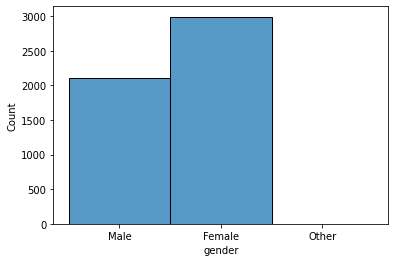

In [ ]:
sns.histplot(df['gender'])

In [ ]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



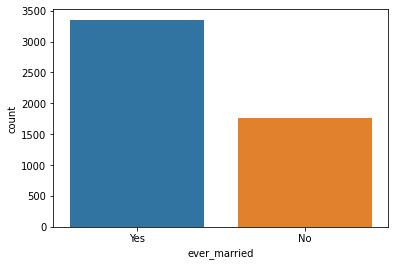

In [ ]:
sns.countplot(df['ever_married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



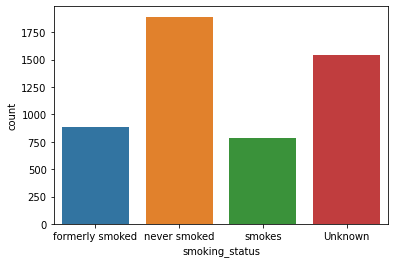

In [ ]:
sns.countplot(df['smoking_status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



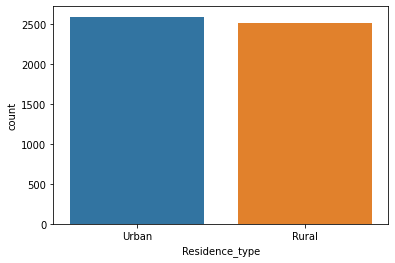

In [ ]:
sns.countplot(df['Residence_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



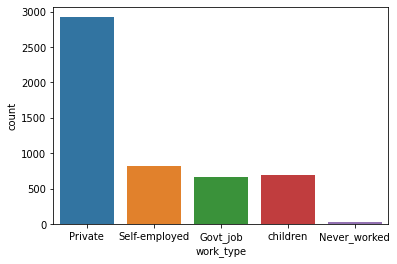

In [ ]:
sns.countplot(df['work_type'])

Observation on Categorical variables

1.   Gender- 2994 females,2115 males and 1 other gender is present.
2.   Ever-Married - 3000-3500 are married and 1000- 1500 are not married.
3.   Smoking status- High number of never smoked which is more than 1750 and some rows have 'Unknown' which means it cannot be determined whether they were formerly smokers , never soked or smokers.
4.  Residence-Type: The urban and rural population is somwhat balanced.
5.  Work-Type : High number of private job holders and low number of people who have never worked.



Data visualisation
In this section we are going to visualise data with respect to 'Stroke'

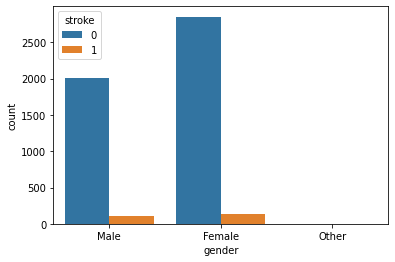

In [ ]:
sns.countplot(x=df.gender,hue=df.stroke)

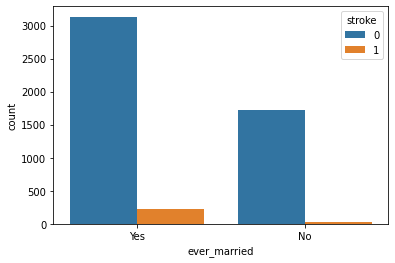

In [ ]:
sns.countplot(x=df.ever_married,hue=df.stroke)

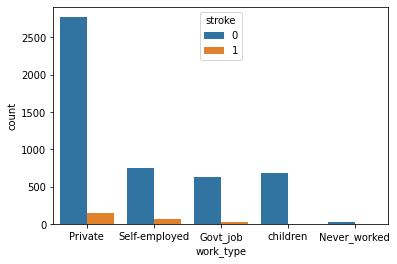

In [ ]:
sns.countplot(x=df.work_type,hue=df.stroke)

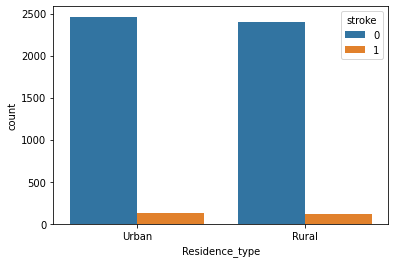

In [ ]:
sns.countplot(x=df.Residence_type,hue=df.stroke)

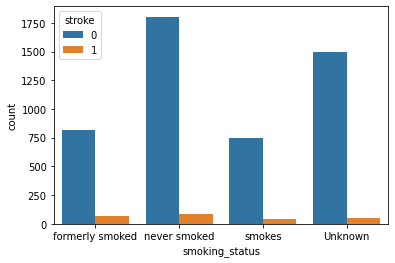

In [ ]:
sns.countplot(x=df.smoking_status,hue=df.stroke)

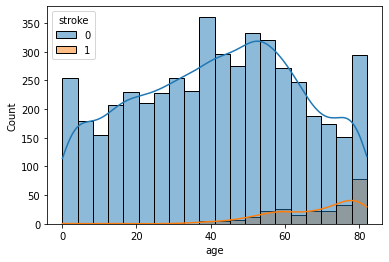

In [ ]:
sns.histplot(x=df.age,hue=df.stroke,kde='true')

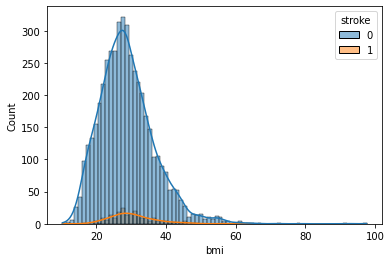

In [ ]:
sns.histplot(x=df.bmi,hue=df.stroke,kde='true')

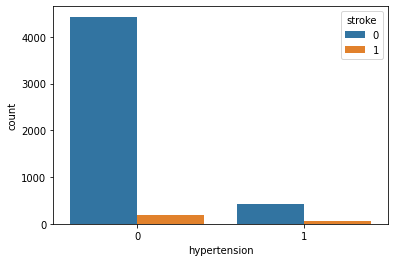

In [ ]:
sns.countplot(x=df.hypertension,hue=df.stroke)

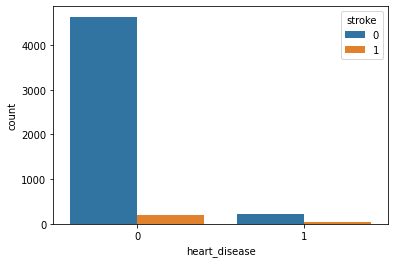

In [ ]:
sns.countplot(x=df.heart_disease,hue=df.stroke)

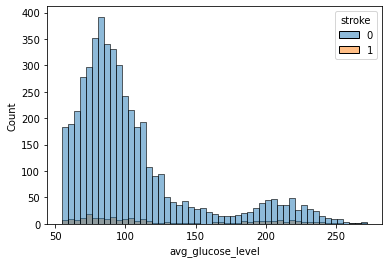

In [ ]:
sns.histplot(x=df.avg_glucose_level,hue=df.stroke)

In the dataset to find out the age group with respect to gender where people had stroke

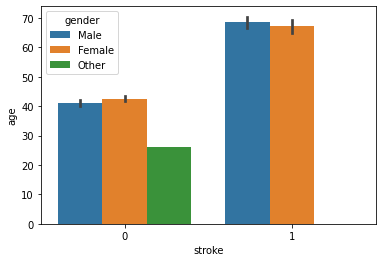

In [ ]:
sns.barplot(y = df.age,x = df.stroke,hue=df.gender)

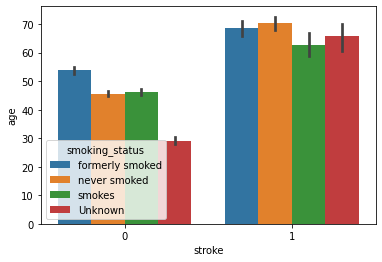

In [ ]:
sns.barplot(y = df.age,x = df.stroke,hue=df.smoking_status)

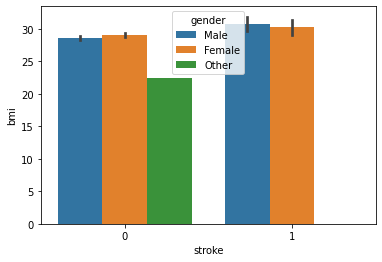

In [ ]:
sns.barplot(y = df.bmi,x = df.stroke,hue=df.gender)

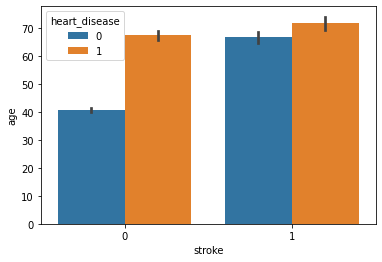

In [ ]:
sns.barplot(y = df.age,x = df.stroke,hue=df.heart_disease)

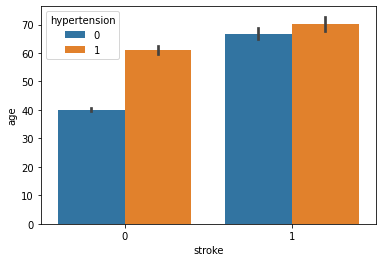

In [ ]:
sns.barplot(y = df.age,x = df.stroke,hue=df.hypertension)

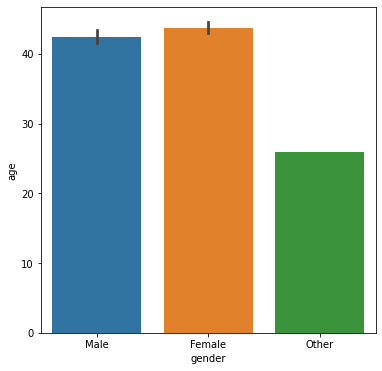

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6, 6)
sns.barplot(x="gender",y="age",data=df)

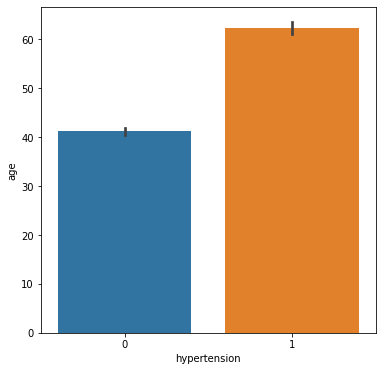

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6, 6)
sns.barplot(x="hypertension",y="age",data=df)

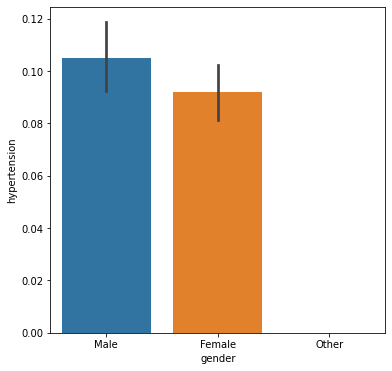

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6, 6)
sns.barplot(x="gender",y="hypertension",data=df)

Finding Co-relation coefficiene


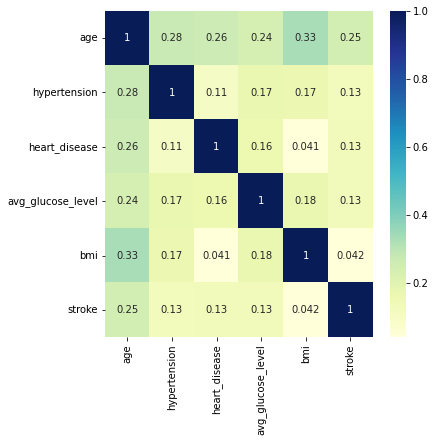

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')

Finding Outliers

In [ ]:
numerical_data = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
numerical_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,NaN
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

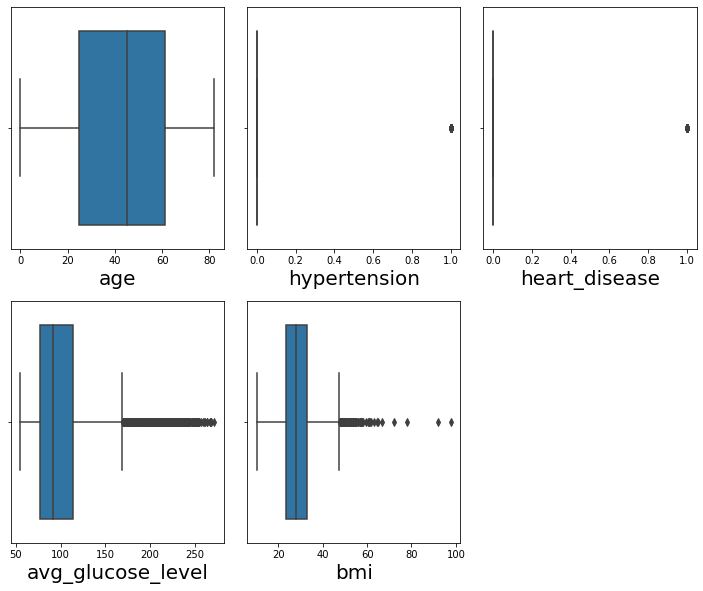

In [ ]:
plt.figure(figsize=(10,20), facecolor='white')
plotnumber=1

for column in numerical_data:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(numerical_data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In the data analysis of the numerical values we have seen that 'bmi' and average glucose level have the presence of outliers.

Checking Outlier for BMI and average glucose level using Z-score

In [ ]:
outlier = []
threshold = 3
mean = np.mean(df['bmi'])
std = np.std(df['bmi'])
for i in df['bmi']:
  z_score = (i - mean) / std
  if np.abs(z_score) > threshold:
     outlier.append(i)
print(outlier)    

[56.6, 54.6, 60.9, 54.7, 64.8, 54.7, 60.2, 71.9, 54.6, 55.7, 55.7, 57.5, 54.2, 78.0, 53.4, 55.2, 55.0, 54.8, 52.8, 66.8, 55.1, 55.9, 57.3, 56.0, 57.7, 54.0, 56.1, 97.6, 53.9, 53.8, 52.7, 52.8, 55.7, 53.5, 63.3, 52.8, 61.2, 58.1, 52.7, 53.4, 59.7, 52.5, 52.9, 54.7, 61.6, 53.8, 54.3, 55.0, 57.2, 64.4, 92.0, 55.9, 57.9, 55.7, 57.2, 60.9, 54.1, 56.6]


In [ ]:
print(len(outlier))
print(max(outlier))

58
97.6


For BMI any range above 30 would mean obesity and the max value of BMI here is 97.6.There are a total of 58 outliers. This is possible medically hence we can keep them for the time being since it is possible to have obesity.

In [ ]:
outlier_avg_glucose = []
threshold = 3
mean = np.mean(df['avg_glucose_level'])
std = np.std(df['avg_glucose_level'])
for i in df['avg_glucose_level']:
  z_score = (i - mean) / std
  if np.abs(z_score) > threshold:
     outlier_avg_glucose.append(i)
print(outlier_avg_glucose)  

[252.72, 243.58, 259.63, 249.31, 263.32, 271.74, 242.52, 250.89, 247.51, 243.53, 242.3, 243.5, 251.6, 247.69, 250.2, 254.6, 254.63, 246.34, 251.46, 267.76, 246.53, 244.28, 251.99, 253.16, 242.84, 249.29, 242.94, 247.48, 266.59, 243.73, 243.59, 250.8, 255.17, 267.61, 260.85, 248.37, 263.56, 247.97, 248.24, 253.93, 254.95, 247.87, 261.67, 256.74, 244.3, 242.62, 243.52, 267.6, 253.86]


In [ ]:
print(len(outlier_avg_glucose))
print(max(outlier_avg_glucose))

49
271.74


There are a total of 49 outliers and the max average glucose level is 271.74 which is possible in case of diabetics.It is medically proven that high diabetes increases the risk of  cardiovascular disease which can lead to stroke.

Removing Nan from BMI.

In [ ]:
df['bmi'].fillna(int(df['bmi'].mean()),inplace=True)

In [ ]:
[features for features in df.columns if df[features].isnull().sum() > 1]

[]

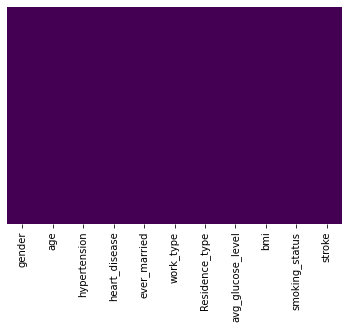

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The NaN values are now removed from the dataframe.

Fixing 'unknown' value from smoking status.There are 1544 such records.

In [ ]:
grp_age = df.groupby(['age','smoking_status']) 

In [ ]:
grp_age.first()

gender  hypertension  heart_disease ever_married  \
age   smoking_status                                                      
0.08  Unknown          Female             0              0           No   
0.16  Unknown            Male             0              0           No   
0.24  Unknown            Male             0              0           No   
0.32  Unknown          Female             0              0           No   
0.40  Unknown            Male             0              0           No   
...                       ...           ...            ...          ...   
81.00 smokes             Male             1              1          Yes   
82.00 Unknown            Male             0              1          Yes   
      formerly smoked  Female             1              1           No   
      never smoked     Female             1              0          Yes   
      smokes             Male             0              1          Yes   

                           work_type Residence_type  avg_glucose_level   bmi  \
age   smoking_status                                                           
0.08  Unknown               children          Urban             139.67  14.1   
0.16  Unknown               children          Urban             114.71  17.4   
0.24  Unknown               children          Rural             118.87  16.3   
0.32  Unknown               children          Rural              73.71  16.2   
0.40  Unknown               children          Urban             109.56  14.3   
...                              ...            ...                ...   ...   
81.00 smokes                 Private          Urban             250.89  28.1   
82.00 Unknown                Private          Rural             208.30  32.5   
      formerly smoked        Private          Rural              84.03  26.5   
      never smoked     Self-employed          Urban             196.92  22.2   
      smokes                 Private          Urban             144.90  26.4   

                       stroke  
age   smoking_status           
0.08  Unknown               0  
0.16  Unknown               0  
0.24  Unknown               0  
0.32  Unknown               0  
0.40  Unknown               0  
...                       ...  
81.00 smokes                1  
82.00 Unknown               1  
      formerly smoked       1  
      never smoked          1  
      smokes                1  

[320 rows x 9 columns]

In [ ]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
from sklearn_pandas import CategoricalImputer
 
# handling NaN values
imputer = CategoricalImputer()
data = np.array(df1['smoking_status'], dtype=object)
imputer.fit_transform(data)

array(['formerly smoked', 'never smoked', 'never smoked', ...,
       'never smoked', 'formerly smoked', 'Unknown'], dtype=object)

Label Encoding of categorical feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
gender=encoder.fit_transform(df['gender'])
smoking_status=encoder.fit_transform(df['smoking_status'])
residence_type =encoder.fit_transform(df['Residence_type'])
ever_married=encoder.fit_transform(df['ever_married'])
work_type=encoder.fit_transform(df['work_type'])


In [ ]:
df['gender'] = gender
df['smoking_status'] = smoking_status
df['Residence_type'] = residence_type
df['ever_married'] = ever_married
df['work_type'] = work_type

In [ ]:
df[['gender','smoking_status','ever_married','Residence_type','work_type']]

,gender,smoking_status,ever_married,Residence_type,work_type
0,1,1,1,1,2
1,0,2,1,0,3
2,1,2,1,0,2
3,0,3,1,1,2
4,0,2,1,0,3
...,...,...,...,...,...
5105,0,2,1,1,2
5106,0,2,1,1,3
5107,0,2,1,0,3
5108,1,1,1,0,2


In [ ]:
df1 = df

Train - Test Split

In [ ]:
## Independent and dependent features
X = df.iloc[:,:-1]
y = df['stroke']

In [ ]:
X.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,28.0,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2


In [ ]:
y.head(3)

0    1
1    1
2    1
Name: stroke, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Normalizing data

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)


In [ ]:
X_train_scaled

array([[ 1.19299477,  1.58415472, -0.32198091, ...,  0.13559307,
        -0.05360734, -0.35272473],
       [-0.83822664,  0.82970766, -0.32198091, ..., -0.39745713,
         0.95159414, -1.28541469],
       [-0.83822664, -0.98984115, -0.32198091, ..., -1.02870079,
         0.61652698,  0.57996524],
       ...,
       [-0.83822664, -1.87032526, -0.32198091, ..., -0.20107021,
        -1.43253758, -1.28541469],
       [ 1.19299477,  1.62853396, -0.32198091, ...,  1.96444623,
         0.26857262, -0.35272473],
       [-0.83822664,  0.11963983, -0.32198091, ..., -0.13816503,
         2.75580192,  1.5126552 ]])

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled

array([[ 1.19299477e+00, -5.46048760e-01, -3.21980910e-01, ...,
        -9.11876874e-01, -7.62403257e-01, -1.28541469e+00],
       [ 1.19299477e+00, -1.46635607e-01, -3.21980910e-01, ...,
        -9.02232874e-01, -7.93817379e-02,  5.79965236e-01],
       [-8.38226644e-01, -1.56677126e+00, -3.21980910e-01, ...,
        -7.02119867e-01, -8.26839249e-01, -1.28541469e+00],
       ...,
       [ 1.19299477e+00,  2.52777546e-01,  3.10577419e+00, ...,
         2.81568169e-01,  1.91249430e-01, -3.52724726e-01],
       [-8.38226644e-01,  5.63432221e-01, -3.21980910e-01, ...,
         4.86064813e-01, -5.17546486e-01,  1.51265520e+00],
       [ 1.19299477e+00,  1.53977548e+00,  3.10577419e+00, ...,
        -9.57204781e-04, -2.08253723e-01,  5.79965236e-01]])

Fixing imbalanced dataset

In [ ]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_res,y_train_res = oversample.fit_resample(X_train_scaled, y_train) 


In [ ]:
y_train_res.shape

(7802,)

In [ ]:
X_train_res.shape

(7802, 10)

In [ ]:
y_train_res.value_counts()

0    3901
1    3901
Name: stroke, dtype: int64

Model - Logistic Regression

In [ ]:
model_LR = LogisticRegression(class_weight = 'balanced')

model_LR.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced')

In [ ]:
predictions_LR = model_LR.predict(X_test_scaled)

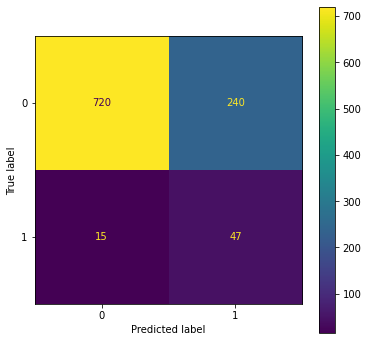

In [ ]:
cm = confusion_matrix(y_test, predictions_LR, labels = model_LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_LR.classes_)
disp.plot()

In [ ]:
Lr_report = classification_report(y_test, predictions_LR)
print(Lr_report)

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.76      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022



In [ ]:
Lr_ac=accuracy_score(y_test,predictions_LR)

In [ ]:
print(Lr_ac)

0.7504892367906066


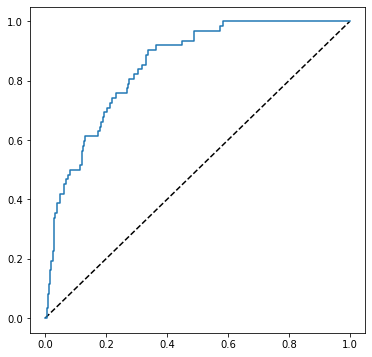

In [ ]:
y_pred_prob = model_LR.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

Model - Decision Tree

In [ ]:
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [ ]:
predictions_DT = model_DT.predict(X_test_scaled)

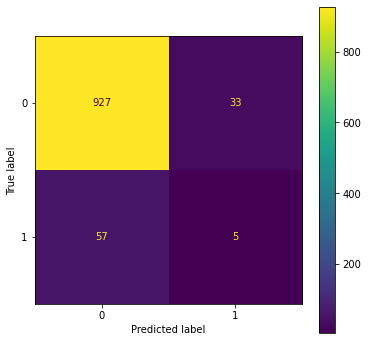

In [ ]:
cm = confusion_matrix(y_test, predictions_DT, labels = model_DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_DT.classes_)
disp.plot()

In [ ]:
DT_report = classification_report(y_test, predictions_DT)
print(DT_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       960
           1       0.13      0.08      0.10        62

    accuracy                           0.91      1022
   macro avg       0.54      0.52      0.53      1022
weighted avg       0.89      0.91      0.90      1022



In [ ]:
DT_ac=accuracy_score(y_test,predictions_DT)
print(DT_ac)

0.9119373776908023


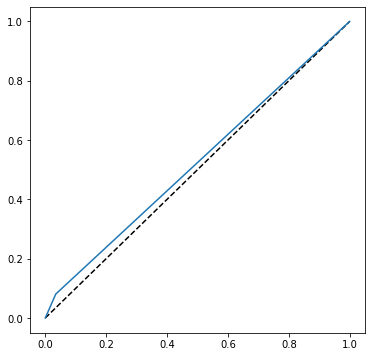

In [ ]:
y_pred_prob = model_DT.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

Random Forest 

In [ ]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [ ]:
predictions_RFC = model_RFC.predict(X_test_scaled)

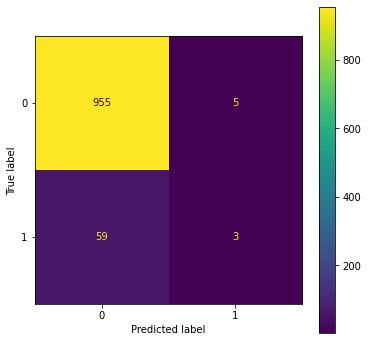

In [ ]:
cm = confusion_matrix(y_test, predictions_RFC, labels = model_RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_RFC.classes_)
disp.plot()

In [ ]:
RFC_report = classification_report(y_test, predictions_RFC)
print(RFC_report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.38      0.05      0.09        62

    accuracy                           0.94      1022
   macro avg       0.66      0.52      0.53      1022
weighted avg       0.91      0.94      0.91      1022



In [ ]:
RFC_ac=accuracy_score(y_test,predictions_RFC)
print(RFC_ac)

0.9373776908023483


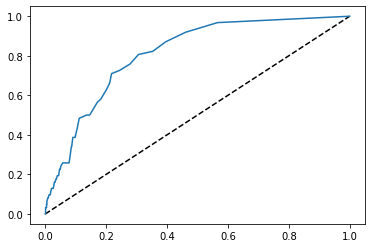

In [ ]:
y_pred_prob = model_RFC.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

Support Vector Machines

In [ ]:
model_SVM = SVC()
model_SVM.fit(X_train_res,y_train_res)

SVC()

In [ ]:
predictions_SVM = model_SVM.predict(X_test_scaled)

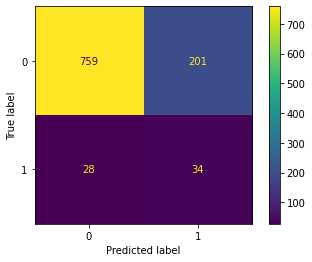

In [ ]:
cm = confusion_matrix(y_test, predictions_SVM, labels = model_SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_SVM.classes_)
disp.plot()

In [ ]:
SVM_report = classification_report(y_test, predictions_SVM)
print(SVM_report)

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       960
           1       0.14      0.55      0.23        62

    accuracy                           0.78      1022
   macro avg       0.55      0.67      0.55      1022
weighted avg       0.91      0.78      0.83      1022



In [ ]:
SVM_ac=accuracy_score(y_test,predictions_SVM)
print(SVM_ac)

0.7759295499021527


K Nearest Neighbor (KNN)

In [ ]:
model_KNN=KNeighborsClassifier()
model_KNN.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [ ]:
predictions_KNN = model_KNN.predict(X_test_scaled)

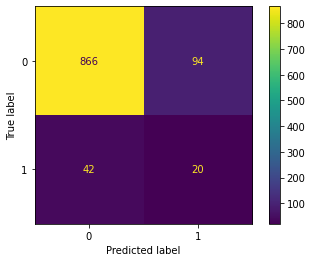

In [ ]:
cm = confusion_matrix(y_test, predictions_KNN, labels = model_KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_KNN.classes_)
disp.plot()

In [ ]:
KNN_report = classification_report(y_test, predictions_KNN)
print(KNN_report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       960
           1       0.18      0.32      0.23        62

    accuracy                           0.87      1022
   macro avg       0.56      0.61      0.58      1022
weighted avg       0.91      0.87      0.88      1022



In [ ]:
KNN_ac=accuracy_score(y_test,predictions_KNN)
print(KNN_ac)

0.8669275929549902


XGBOOST - Classifier

In [ ]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_res,y_train_res)

XGBClassifier()

In [ ]:
predictions_XGB = model_XGB.predict(X_test_scaled)

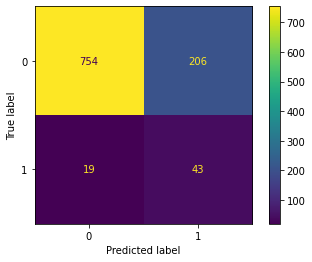

In [ ]:
cm = confusion_matrix(y_test, predictions_XGB, labels = model_XGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_XGB.classes_)
disp.plot()

In [ ]:
XGB_report = classification_report(y_test, predictions_XGB)
print(XGB_report)

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       960
           1       0.17      0.69      0.28        62

    accuracy                           0.78      1022
   macro avg       0.57      0.74      0.57      1022
weighted avg       0.93      0.78      0.83      1022



In [ ]:
XGB_ac=accuracy_score(y_test,predictions_XGB)
print(XGB_ac)

0.7798434442270059


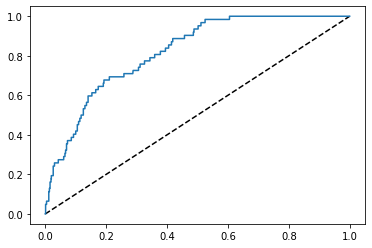

In [ ]:
y_pred_prob = model_XGB.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

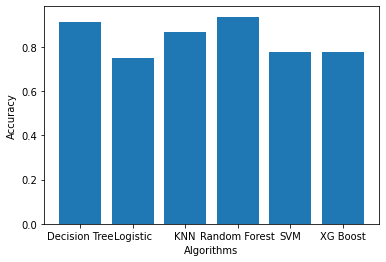

In [ ]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM','XG Boost'],[DT_ac,Lr_ac,KNN_ac,RFC_ac,SVM_ac,XGB_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

Observations :- The random forest only has an accuracy of 93% and the rest are all below that.

Experiment 2 & 3 - Fine the model to increase the accuracy.

In [83]:
data = pd.read_csv(path)

In [84]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [85]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [86]:
data.drop(['id'],axis=1,inplace=True)

In [87]:
data['bmi'].fillna(int(data['bmi'].mean()),inplace=True)

In [88]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [89]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

As seen the most frequent occurrence of category in smoking status is 'never smoked' hence replacing 'unknown' with never smoked.

In [90]:
data['smoking_status'] = data['smoking_status'].replace(['Unknown'],['never smoked'])

In [91]:
data['smoking_status'].value_counts()

never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [92]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [93]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [94]:
data['gender'] = data['gender'].map({'Female':0,'Male':1,'Other':2})
data['ever_married'] = data['ever_married'].map({'Yes': 0, 'No': 1})
data['work_type'] = data['work_type'].map({'Private': 1, 'Self-employed': 2, 'Govt_job':3, 'children':0,'Never_worked':4})
data['Residence_type'] = data['Residence_type'].map({'Urban': 1, 'Rural':0})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':1, 'never smoked':0, 'smokes':2})

In [95]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

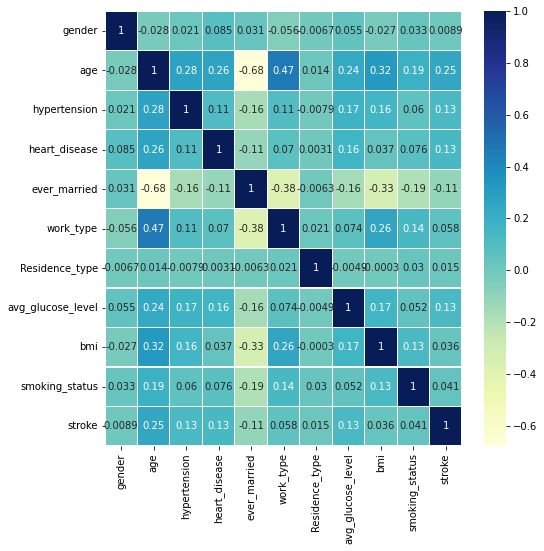

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr(), cmap ='YlGnBu', linewidths = 0.2, annot = True)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [97]:
data.loc[data['bmi'] > 30, 'bmi'] = 30

In [98]:
data['bmi'].max()

30.0

In [99]:
data.loc[data['avg_glucose_level'] > 125, 'avg_glucose_level'] = 126
data['avg_glucose_level'].max()

126.0

Removing outliers in average glucose level and bmi

In [19]:
ndata = data[data.stroke ==1]


In [20]:
ndata

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,1,1,228.69,36.6,1,1
1,0,61.0,0,0,0,2,0,202.21,28.0,0,1
2,1,80.0,0,1,0,1,0,105.92,32.5,0,1
3,0,49.0,0,0,0,1,1,171.23,34.4,2,1
4,0,79.0,1,0,0,2,0,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0,0,0,1,0,84.96,36.7,0,1
245,0,14.0,0,0,1,0,0,57.93,30.9,0,1
246,0,75.0,0,0,0,2,0,78.80,29.3,1,1
247,1,71.0,1,0,0,2,0,87.80,28.0,0,1


In [21]:
data.drop(data[data.stroke ==1].index, inplace = True)

In [22]:
data['stroke'].value_counts()

0    4861
Name: stroke, dtype: int64

In [23]:
percentile25 = data.avg_glucose_level.quantile(0.25)
percentile75 = data.avg_glucose_level.quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = data[data.avg_glucose_level < upper_limit ]
 
new_data.shape

(4310, 11)

In [24]:
percentile25 = new_data.bmi.quantile(0.25)
percentile75 = new_data.bmi.quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data1 = new_data[new_data.bmi < upper_limit ]
new_data1.shape

(4214, 11)

In [25]:
new_data1.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4214.000000,4214.00000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.0
mean,0.410536,39.86093,0.068344,0.035833,0.386331,1.252254,0.506407,91.350838,27.719554,0.459896,0.0
std,0.492472,22.21135,0.252365,0.185896,0.486966,0.888897,0.500018,22.404573,6.585002,0.743150,0.0
min,0.000000,0.08000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.0
25%,0.000000,22.00000,0.000000,0.000000,0.000000,1.000000,0.000000,75.152500,23.100000,0.000000,0.0
50%,0.000000,40.50000,0.000000,0.000000,0.000000,1.000000,1.000000,88.030000,27.600000,0.000000,0.0
75%,1.000000,57.00000,0.000000,0.000000,1.000000,2.000000,1.000000,103.787500,31.900000,1.000000,0.0
max,2.000000,82.00000,1.000000,1.000000,1.000000,4.000000,1.000000,166.380000,45.900000,2.000000,0.0


In [26]:
new_data1['avg_glucose_level'].dtype

dtype('float64')

In [27]:
data['bmi'].dtype

dtype('float64')

In [28]:
ndata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,1,1,228.69,36.6,1,1
1,0,61.0,0,0,0,2,0,202.21,28.0,0,1
2,1,80.0,0,1,0,1,0,105.92,32.5,0,1
3,0,49.0,0,0,0,1,1,171.23,34.4,2,1
4,0,79.0,1,0,0,2,0,174.12,24.0,0,1


In [29]:
frames = [new_data1, ndata]
New_DF=pd.concat(frames)

In [30]:
New_DF['stroke'].value_counts()

0    4214
1     249
Name: stroke, dtype: int64

In [31]:
New_DF.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [100]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [101]:
#X = New_DF.iloc[:,:-1]
#y = New_DF['stroke']

X = data.iloc[:,:-1]
y = data['stroke']

In [102]:
X.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.10,random_state=1)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_res,y_train_res = oversample.fit_resample(X_train_scaled, y_train)

In [68]:
y_test.value_counts()

0    421
1     26
Name: stroke, dtype: int64

In [38]:
#ros = RandomOverSampler(random_state=1)
#X_train_res, y_train_res = ros.fit_resample(X_train_scaled, y_train)

In [106]:
model_LR = LogisticRegression(class_weight = 'balanced')
model_LR.fit(X_train_res, y_train_res)
predictions_LR = model_LR.predict(X_test_scaled)
LR_report = classification_report(y_test, predictions_LR)

In [107]:
print(LR_report)

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       494
           1       0.10      0.88      0.19        17

    accuracy                           0.75       511
   macro avg       0.55      0.81      0.52       511
weighted avg       0.96      0.75      0.83       511



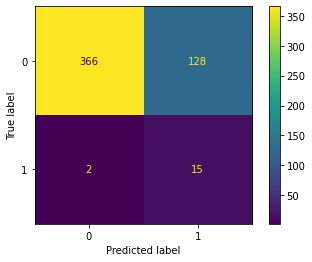

In [108]:
cm = confusion_matrix(y_test, predictions_LR, labels = model_LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_LR.classes_)
disp.plot()

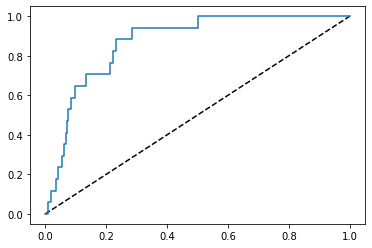

In [109]:
y_pred_prob = model_LR.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [110]:
model_1_ac=accuracy_score(y_test,predictions_LR)

In [111]:
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train_res, y_train_res)
predictions_DT = model_DT.predict(X_test_scaled)
DT_report = classification_report(y_test, predictions_DT)
print(DT_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       494
           1       0.18      0.29      0.22        17

    accuracy                           0.93       511
   macro avg       0.58      0.62      0.59       511
weighted avg       0.95      0.93      0.94       511



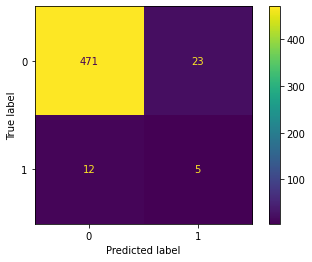

In [112]:
cm = confusion_matrix(y_test, predictions_DT, labels = model_DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_DT.classes_)
disp.plot()

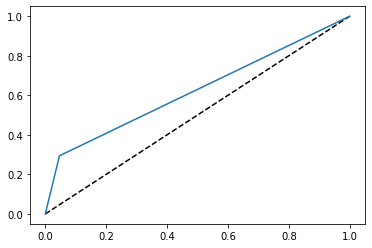

In [113]:
y_pred_prob = model_DT.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [114]:
model_2_ac=accuracy_score(y_test,predictions_DT)

In [115]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train_res, y_train_res)
predictions_RFC = model_RFC.predict(X_test_scaled)
RFC_report = classification_report(y_test, predictions_RFC)
print(RFC_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       494
           1       0.07      0.06      0.06        17

    accuracy                           0.94       511
   macro avg       0.52      0.52      0.52       511
weighted avg       0.94      0.94      0.94       511



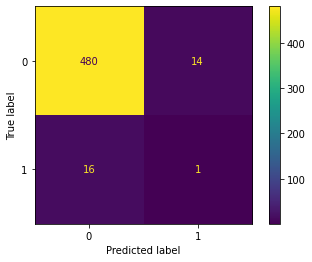

In [116]:
cm = confusion_matrix(y_test, predictions_RFC, labels = model_RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_RFC.classes_)
disp.plot()

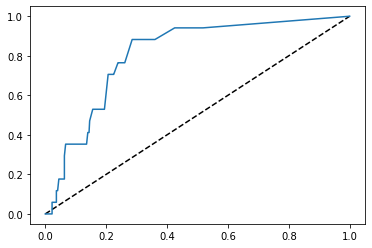

In [117]:
y_pred_prob = model_RFC.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [118]:
model_3_ac=accuracy_score(y_test,predictions_RFC)

In [119]:
model_SVM = SVC()
model_SVM.fit(X_train_res,y_train_res)
predictions_SVM = model_SVM.predict(X_test_scaled)
SVM_report = classification_report(y_test, predictions_SVM)
print(SVM_report)

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       494
           1       0.10      0.76      0.18        17

    accuracy                           0.77       511
   macro avg       0.55      0.77      0.52       511
weighted avg       0.96      0.77      0.84       511



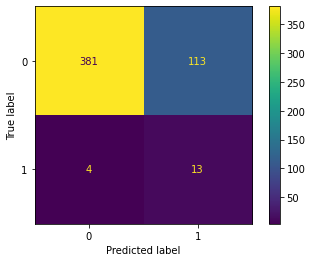

In [120]:
cm = confusion_matrix(y_test, predictions_SVM, labels = model_SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_SVM.classes_)
disp.plot()

In [121]:
model_4_ac=accuracy_score(y_test,predictions_SVM)

In [122]:
model_KNN=KNeighborsClassifier()
model_KNN.fit(X_train_res,y_train_res)
predictions_KNN = model_KNN.predict(X_test_scaled)
KNN_report = classification_report(y_test, predictions_KNN)
print(KNN_report)

              precision    recall  f1-score   support

           0       0.97      0.88      0.93       494
           1       0.08      0.29      0.12        17

    accuracy                           0.86       511
   macro avg       0.53      0.59      0.53       511
weighted avg       0.94      0.86      0.90       511



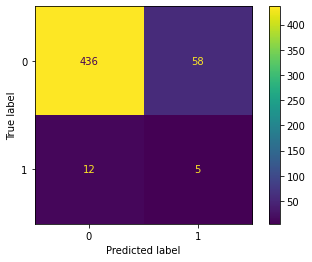

In [123]:
cm = confusion_matrix(y_test, predictions_KNN, labels = model_KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_KNN.classes_)
disp.plot()

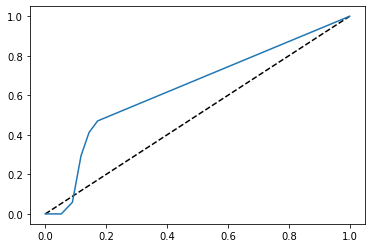

In [124]:
y_pred_prob = model_KNN.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [125]:
model_5_ac=accuracy_score(y_test,predictions_KNN)

In [145]:
model_5_ac.dtype

dtype('float64')

In [126]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_res,y_train_res)
predictions_XGB = model_XGB.predict(X_test_scaled)
XGB_report = classification_report(y_test, predictions_XGB)
print(XGB_report)

              precision    recall  f1-score   support

           0       0.99      0.78      0.88       494
           1       0.12      0.82      0.20        17

    accuracy                           0.78       511
   macro avg       0.55      0.80      0.54       511
weighted avg       0.96      0.78      0.85       511



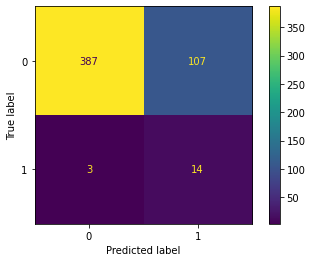

In [127]:
cm = confusion_matrix(y_test, predictions_XGB, labels = model_XGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_XGB.classes_)
disp.plot()

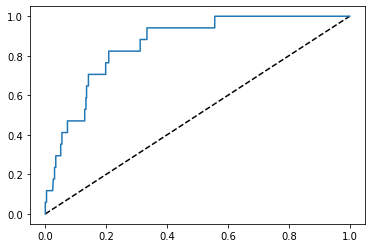

In [128]:
y_pred_prob = model_XGB.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [129]:
model_6_ac=accuracy_score(y_test,predictions_XGB)

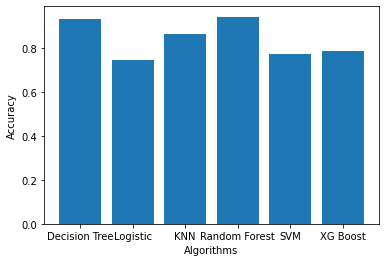

In [130]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM','XG Boost'],[model_2_ac,model_1_ac,model_5_ac,model_3_ac,model_4_ac,model_6_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [133]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X_train_res,y_train_res,cv=skfold)
print(np.mean(scores))

0.9768730030403946


In [137]:
model_LR=LogisticRegression()
scores_LR=cross_val_score(model_LR,X_train_res,y_train_res,cv=skfold)
print(np.mean(scores_LR))

0.7692933262782017


In [139]:
model_Support_Vector_Machines=SVC()
scores_SVM=cross_val_score(model_Support_Vector_Machines,X_train_res,y_train_res,cv=skfold)
print(np.mean(scores_SVM))

0.8234504445847601


In [140]:
model_KN_Neigbbors=KNeighborsClassifier()
scores_KNN=cross_val_score(model_KN_Neigbbors,X_train_res,y_train_res,cv=skfold)
print(np.mean(scores_KNN))

0.9284411634148148


In [141]:
model_XGBOOST=XGBClassifier()
scores_XGB=cross_val_score(model_XGBOOST,X_train_res,y_train_res,cv=skfold)
print(np.mean(scores_XGB))

0.8453181398843771


In [142]:
model_Random=RandomForestClassifier()
scores_RFC=cross_val_score(model_Random,X_train_res,y_train_res,cv=skfold)
print(np.mean(scores_RFC))

0.9891230327099769
